In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")  # Suppress all warnings

In [2]:
# Load the file
file_path = 'nationaldatabaseofchildcareprices.xlsx'
data = pd.ExcelFile(file_path)

# get sheet name
sheet_names = data.sheet_names

# Load the data from the first sheet and inspect it
data_main = data.parse(sheet_names[0])
# Preview data
data_main.head()

,State_Name,State_Abbreviation,County_Name,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,...,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
0,Alabama,AL,Autauga County,1001,2008,5.42,4.41,6.32,4.6,3.5,...,83.45,3.0,81.40,1.0,97.4,1.0,97.4,3.0,95.0,1.0
1,Alabama,AL,Autauga County,1001,2009,5.93,5.72,6.11,4.8,4.6,...,87.39,3.0,85.68,1.0,102.0,1.0,102.0,3.0,100.0,1.0
2,Alabama,AL,Autauga County,1001,2010,6.21,5.57,6.78,5.1,4.6,...,91.33,3.0,89.96,1.0,106.6,1.0,106.6,3.0,105.0,1.0
3,Alabama,AL,Autauga County,1001,2011,7.55,8.13,7.03,6.2,6.3,...,95.28,3.0,94.25,1.0,111.2,1.0,111.2,3.0,110.0,1.0
4,Alabama,AL,Autauga County,1001,2012,8.60,8.88,8.29,6.7,6.4,...,99.22,3.0,98.53,1.0,115.8,1.0,115.8,3.0,115.0,1.0


In [3]:
unique_values = data_main['State_Name'].unique()
unique_county_values = data_main['County_Name']


print(unique_values)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [4]:
unique_county_values

0        Autauga County
1        Autauga County
2        Autauga County
3        Autauga County
4        Autauga County
              ...      
34562     Weston County
34563     Weston County
34564     Weston County
34565     Weston County
34566     Weston County
Name: County_Name, Length: 34567, dtype: object

In [5]:
data_main.columns

Index(['State_Name', 'State_Abbreviation', 'County_Name', 'County_FIPS_Code',
       'StudyYear', 'UNR_16', 'FUNR_16', 'MUNR_16', 'UNR_20to64',
       'FUNR_20to64',
       ...
       'MFCCToddler', 'MFCCToddler_flag', 'MFCCPreschool',
       'MFCCPreschool_flag', '_75FCCInfant', '_75FCCInfant_flag',
       '_75FCCToddler', '_75FCCToddler_flag', '_75FCCPreschool',
       '_75FCCPreschool_flag'],
      dtype='object', length=227)

#### Dataset has different columns which represents child care median weekly costing for different age groups like toddlers, infant, Preschool.

#### From dataset looks like there are two main types of distinction.
1. Center Based Care
2. Family Childcare

#### For our quick analysis we will just filterout and  narrow down details for one state "North Carolina". This  will help to work on larger data in upcoming milestone

In [9]:
# Filter data for North Carolina
data_main = data_main[data_main["State_Name"].str.contains("North Carolina", na=False)]

In [10]:
data_main.head()

,State_Name,State_Abbreviation,County_Name,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,...,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
20789,North Carolina,NC,Alamance County,37001,2008,5.71,5.32,6.07,5.2,4.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20790,North Carolina,NC,Alamance County,37001,2009,6.60,6.12,7.05,6.1,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20791,North Carolina,NC,Alamance County,37001,2010,8.35,7.42,9.24,7.9,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20792,North Carolina,NC,Alamance County,37001,2011,8.64,7.55,9.68,8.1,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20793,North Carolina,NC,Alamance County,37001,2012,9.38,8.41,10.33,8.7,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Filter relevant columns for childcare metrics
nc_childcare_filtered = [
    "County_Name", "StudyYear", 
    "MFCCPreschool", "MFCCToddler", "MFCCInfant",
    "_75FCCPreschool", "_75FCCToddler", "_75FCCInfant"
]

# Filter data for relevant childcare metrics
childcare_data = data_main[nc_childcare_filtered]

# Convert numeric columns to proper types and handle missing values
numeric_columns = ["MFCCPreschool", "MFCCToddler", "MFCCInfant",
                   "_75FCCPreschool", "_75FCCToddler", "_75FCCInfant"]
childcare_data[numeric_columns] = childcare_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Summarize key statistics for childcare costs by year
childcare_summary = childcare_data.groupby("StudyYear")[numeric_columns].mean()

# Prepare a county-wise summary for the latest year available
latest_year = childcare_data["StudyYear"].max()
latest_year_data = childcare_data[childcare_data["StudyYear"] == latest_year].groupby("County_Name")[numeric_columns].mean()

childcare_summary.head(), latest_year_data.head()


(           MFCCPreschool  MFCCToddler  MFCCInfant  _75FCCPreschool  \
 StudyYear                                                            
 2008                 NaN          NaN         NaN              NaN   
 2009                 NaN          NaN         NaN              NaN   
 2010                 NaN          NaN         NaN              NaN   
 2011                 NaN          NaN         NaN              NaN   
 2012                 NaN          NaN         NaN              NaN   
 
            _75FCCToddler  _75FCCInfant  
 StudyYear                               
 2008                 NaN           NaN  
 2009                 NaN           NaN  
 2010                 NaN           NaN  
 2011                 NaN           NaN  
 2012                 NaN           NaN  ,
                   MFCCPreschool  MFCCToddler  MFCCInfant  _75FCCPreschool  \
 County_Name                                                                 
 Alamance County          144.99       139.99     

#### I have analyzed the key childcare metrics, focusing on trends in childcare costs across years and counties in North Carolina.

Summary of Analysis:
1. Childcare Cost Summary by Year:
   Averages of childcare costs for preschool, toddlers, and infants (both median and 75th percentile) were summarized by year.
   This highlights how costs have evolved over time.

3. County-Wise Childcare Costs for the Latest Year:
   The most recent year's data was analyzed to identify county-level variations in childcare costs.
   Metrics include both median and 75th percentile costs for infants, toddlers, and preschoolers.

In [13]:
# Filter data for North Carolina
nc_filtered_data = childcare_data[childcare_data["County_Name"].str.contains("North Carolina", na=False)]

### Analyze unemployment and childcare correlation for North Carolina.

In [15]:
# Add unemployment metrics to the dataset for correlation analysis
unemployment_metrics = ["UNR_16", "FUNR_16", "MUNR_16"]

# Filter relevant data
correlation_data = data_main[["StudyYear", "County_Name"] + numeric_columns + unemployment_metrics]

# Ensure numeric conversion for unemployment metrics
correlation_data[unemployment_metrics] = correlation_data[unemployment_metrics].apply(pd.to_numeric, errors='coerce')

# Calculate correlations between childcare costs and unemployment metrics
correlation_results = correlation_data[unemployment_metrics + numeric_columns].corr()

# Extract correlations between childcare metrics and unemployment metrics
childcare_unemployment_corr = correlation_results.loc[unemployment_metrics, numeric_columns]


childcare_unemployment_corr


,MFCCPreschool,MFCCToddler,MFCCInfant,_75FCCPreschool,_75FCCToddler,_75FCCInfant
UNR_16,-0.449465,-0.447333,-0.445392,-0.367886,-0.326404,-0.305526
FUNR_16,-0.367890,-0.345478,-0.338296,-0.290584,-0.241759,-0.217027
MUNR_16,-0.441622,-0.458845,-0.461730,-0.371067,-0.344260,-0.331151


#### Key Findings:
Overall Negative Correlation:

Childcare costs generally have a negative correlation with unemployment rates, meaning higher unemployment rates tend to be associated with lower childcare costs.
Correlation Strength:

UNR_16 (General Unemployment Rate):
Moderate negative correlations across childcare metrics (e.g., -0.45 with preschool costs, -0.44 with infant costs).
FUNR_16 (Female Unemployment Rate):
Slightly weaker negative correlations compared to general unemployment, especially with preschool and infant costs.
MUNR_16 (Male Unemployment Rate):
Similar patterns to general unemployment but slightly stronger negative correlations with childcare costs.
75th Percentile Costs:

Costs at the 75th percentile have slightly weaker correlations with unemployment rates, suggesting regional disparities may dilute the strength of this relationship.
Insights:
Counties with higher unemployment rates might have reduced demand for formal childcare services, leading to lower median and average costs.
Male unemployment rates appear to have a slightly stronger impact on childcare costs, potentially reflecting regional economic dependencies.

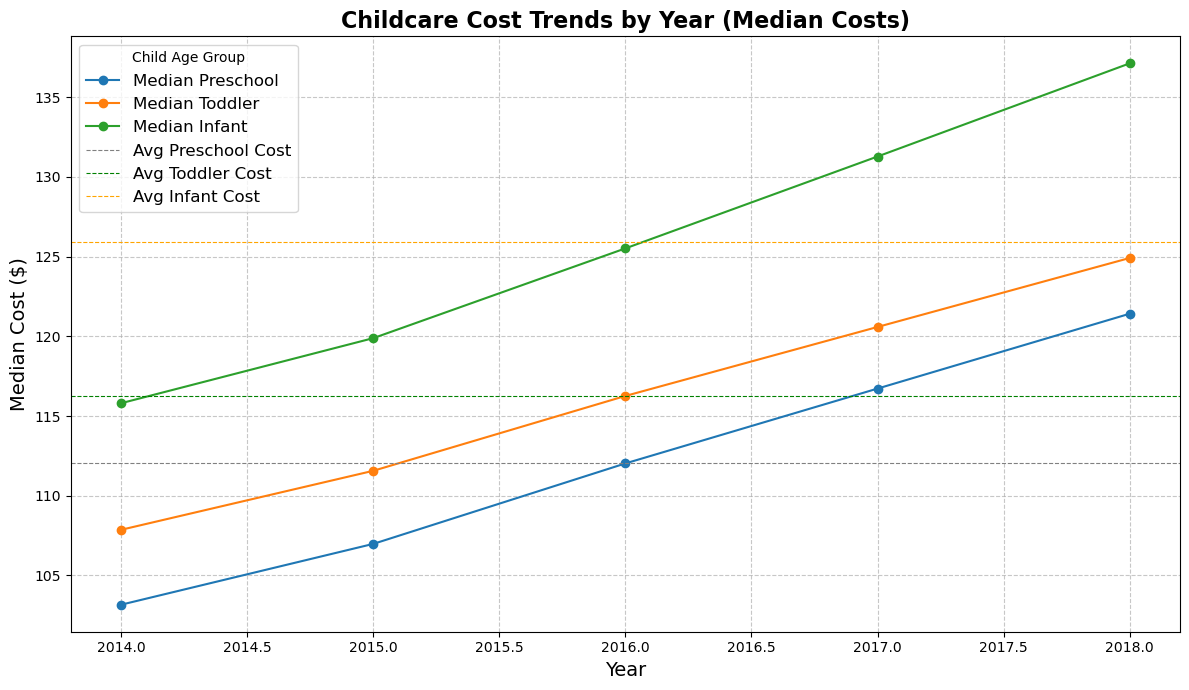

In [17]:
# Visual 1: Childcare Cost Trends by Year (Median Costs with Annotations)
plt.figure(figsize=(12, 7))
for column in ["MFCCPreschool", "MFCCToddler", "MFCCInfant"]:
    plt.plot(childcare_summary.index, childcare_summary[column], marker='o', label=column.replace("MFCC", "Median "))

plt.title("Childcare Cost Trends by Year (Median Costs)", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Median Cost ($)", fontsize=14)
plt.axhline(childcare_summary["MFCCPreschool"].mean(), color="grey", linestyle="--", linewidth=0.8, label="Avg Preschool Cost")
plt.axhline(childcare_summary["MFCCToddler"].mean(), color="green", linestyle="--", linewidth=0.8, label="Avg Toddler Cost")
plt.axhline(childcare_summary["MFCCInfant"].mean(), color="orange", linestyle="--", linewidth=0.8, label="Avg Infant Cost")
plt.legend(title="Child Age Group", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



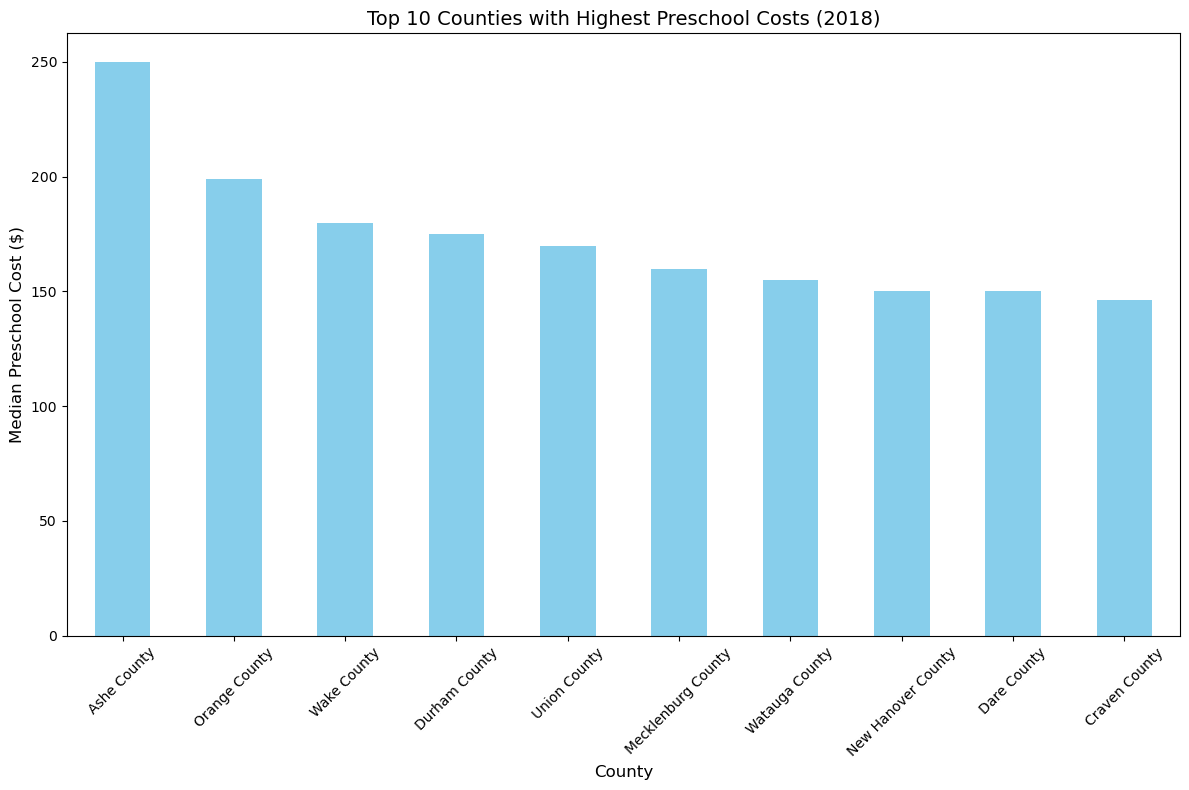

In [18]:
# Visual 2: County-Wise Childcare Costs (Latest Year)
latest_year_data_sorted = latest_year_data.sort_values("MFCCPreschool", ascending=False)
plt.figure(figsize=(12, 8))
latest_year_data_sorted["MFCCPreschool"].head(10).plot(kind="bar", color="skyblue")

plt.title(f"Top 10 Counties with Highest Preschool Costs ({latest_year})", fontsize=14)
plt.xlabel("County", fontsize=12)
plt.ylabel("Median Preschool Cost ($)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



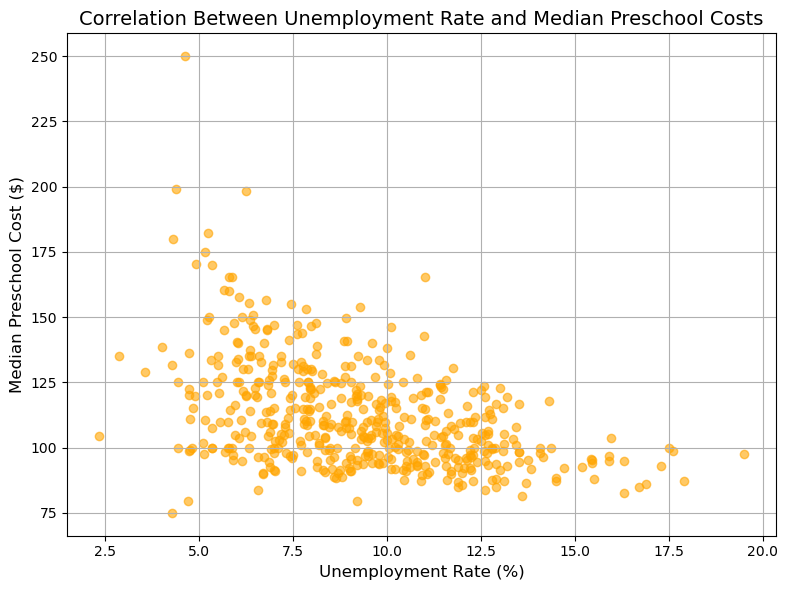

In [19]:

# Visual 3: Correlation Between Unemployment and Preschool Costs
plt.figure(figsize=(8, 6))
plt.scatter(correlation_data["UNR_16"], correlation_data["MFCCPreschool"], alpha=0.6, color="orange")
plt.title("Correlation Between Unemployment Rate and Median Preschool Costs", fontsize=14)
plt.xlabel("Unemployment Rate (%)", fontsize=12)
plt.ylabel("Median Preschool Cost ($)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Visual Analysis Overview:
1. __Childcare Cost Trends by Year in NC:__
   
   Line charts show the evolution of median childcare costs (Preschool, Toddler, and Infant) across the years.
   This helps parents and providers see how costs have changed over time and identify upward or downward trends. Horizontal dashed lines indicate the average costs for preschool, toddler, and infant care, providing context for yearly variations.

2. __County-Wise Childcare Costs (Latest Year):__

   Bar chart of the top 10 counties with the highest median preschool costs for the latest year.
   This highlights areas with the highest childcare expenses, allowing parents and providers to compare regional affordability.

3. __Correlation Between Unemployment and Preschool Costs:__

   Scatter plot showing the relationship between general unemployment rates (UNR_16) and median preschool costs.
   A clear negative correlation suggests that higher unemployment may be associated with lower childcare costs.